In [1]:
from nicompiler_backend import Experiment
import matplotlib.pyplot as plt

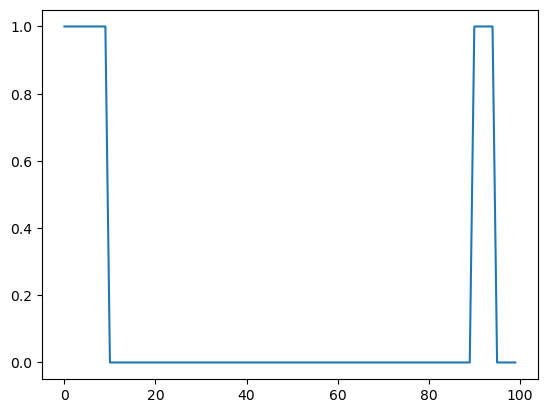

In [10]:
# Instantiate experiment, define devices and channels
exp = Experiment()
exp.add_ao_device(name="PXI1Slot3", samp_rate=1e6)
exp.add_ao_channel(name="PXI1Slot3", channel_id=0)

exp.add_ao_device(name="PXI1Slot4", samp_rate=1e6)
exp.add_ao_channel(name="PXI1Slot4", channel_id=0)

exp.add_do_device(name="PXI1Slot6", samp_rate=1e7)
exp.add_do_channel(name="PXI1Slot6", port_id=0, line_id=0)
exp.add_do_channel("PXI1Slot6", port_id=0, line_id=4)

# Define synchronization behavior
exp.device_cfg_trig(name="PXI1Slot3", trig_line="PXI1_Trig0", export_trig=True)
exp.device_cfg_ref_clk(name="PXI1Slot3", ref_clk_line="PXI1_Trig7", 
                       ref_clk_rate=1e7, export_ref_clk=True)
exp.device_cfg_trig(name="PXI1Slot4", trig_line="PXI1_Trig0", export_trig=False)
exp.device_cfg_ref_clk(name="PXI1Slot4", ref_clk_line="PXI1_Trig7", 
                       ref_clk_rate=1e7, export_ref_clk=False)
exp.device_cfg_samp_clk_src(name="PXI1Slot6", src="PXI1_Trig7")
exp.device_cfg_trig(name="PXI1Slot6", trig_line="PXI1_Trig0", export_trig=False)

# Define signal
# Arguments of "option" type in rust is converted to optional arguments in python
exp.sine(dev_name="PXI1Slot3", chan_name="ao0", t=0., duration=1., keep_val=False, 
         freq=7., dc_offset=1.)
exp.constant(dev_name="PXI1Slot3", chan_name="ao0", t=9., duration=0.5, value=1., keep_val=False)

exp.high("PXI1Slot6", "port0/line0", t=0., duration=1.)
exp.high("PXI1Slot6", "port0/line0", t=9., duration=.5)

exp.go_high("PXI1Slot6", "port0/line4", t=0.)
exp.go_low("PXI1Slot6", "port0/line4", t=1.)
exp.go_high("PXI1Slot6", "port0/line4", t=9.)
exp.go_low("PXI1Slot6", "port0/line4", t=9.5)

exp.compile_with_stoptime(10.)
# Returns a 100-element vector of float
sig = exp.channel_calc_signal_nsamps("PXI1Slot6", "port0/line4", start_time=0., end_time=10., num_samps=100)
plt.plot(sig)